In [3]:
!pip install kagglehub --q

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Style des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(" Début de l'analyse exploratoire climatique")

 Début de l'analyse exploratoire climatique


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

print("Path to dataset files:", path)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 84.7M/84.7M [00:32<00:00, 2.71MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

print("CHARGEMENT DES DONNÉES RÉELLES KAGGLE...")

# Chemin vers les données téléchargées
data_path = "/root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2"

# Lister les fichiers disponibles
files = os.listdir(data_path)
print(" Fichiers disponibles:")
for file in files:
    print(f"  - {file}")

# Charger les données principales
global_temp = pd.read_csv(f"{data_path}/GlobalTemperatures.csv")
country_temp = pd.read_csv(f"{data_path}/GlobalLandTemperaturesByCountry.csv")
city_temp = pd.read_csv(f"{data_path}/GlobalLandTemperaturesByMajorCity.csv")

print("\n DONNÉES CHARGÉES AVEC SUCCÈS!")

CHARGEMENT DES DONNÉES RÉELLES KAGGLE...
 Fichiers disponibles:
  - GlobalLandTemperaturesByCountry.csv
  - GlobalLandTemperaturesByCity.csv
  - GlobalLandTemperaturesByMajorCity.csv
  - GlobalTemperatures.csv
  - GlobalLandTemperaturesByState.csv

 DONNÉES CHARGÉES AVEC SUCCÈS!


In [8]:
print("🧹 NETTOYAGE ET PRÉPARATION DES DONNÉES")
print("=" * 50)

# Nettoyage des données globales
global_temp_clean = global_temp.copy()

# Conversion de la colonne de date
global_temp_clean['dt'] = pd.to_datetime(global_temp_clean['dt'])

# Extraction de l'année et du mois
global_temp_clean['Year'] = global_temp_clean['dt'].dt.year
global_temp_clean['Month'] = global_temp_clean['dt'].dt.month

# Suppression des valeurs manquantes
global_temp_clean = global_temp_clean.dropna(subset=['LandAverageTemperature'])

print(f"✅ Données nettoyées: {global_temp_clean.shape}")
print(f"📅 Période: {global_temp_clean['Year'].min()} - {global_temp_clean['Year'].max()}")
print(f"🌡️  Température moyenne: {global_temp_clean['LandAverageTemperature'].mean():.2f}°C")

# Affichage des premières lignes
print("\n📊 Aperçu des données nettoyées:")
print(global_temp_clean.head())

🧹 NETTOYAGE ET PRÉPARATION DES DONNÉES
✅ Données nettoyées: (3180, 11)
📅 Période: 1750 - 2015
🌡️  Température moyenne: 8.37°C

📊 Aperçu des données nettoyées:
          dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4         

In [9]:
print(" DÉBUT DE L'ANALYSE EXPLORATOIRE APPROFONDIE")
print("=" * 60)

# Chargement de tous les fichiers
global_temp = pd.read_csv(f"{data_path}/GlobalTemperatures.csv")
country_temp = pd.read_csv(f"{data_path}/GlobalLandTemperaturesByCountry.csv")
city_temp = pd.read_csv(f"{data_path}/GlobalLandTemperaturesByMajorCity.csv")
state_temp = pd.read_csv(f"{data_path}/GlobalLandTemperaturesByState.csv")

print("OVERVIEW DES DATASETS:")
print(f"Global Temperatures: {global_temp.shape} - {global_temp['dt'].min()} to {global_temp['dt'].max()}")
print(f" By Country: {country_temp.shape} - {country_temp['dt'].min()} to {country_temp['dt'].max()}")
print(f" By City: {city_temp.shape} - {city_temp['dt'].min()} to {city_temp['dt'].max()}")
print(f" By State: {state_temp.shape} - {state_temp['dt'].min()} to {state_temp['dt'].max()}")

 DÉBUT DE L'ANALYSE EXPLORATOIRE APPROFONDIE
OVERVIEW DES DATASETS:
Global Temperatures: (3192, 9) - 1750-01-01 to 2015-12-01
 By Country: (577462, 4) - 1743-11-01 to 2013-09-01
 By City: (239177, 7) - 1743-11-01 to 2013-09-01
 By State: (645675, 5) - 1743-11-01 to 2013-09-01


 ANALYSE APPROFONDIE DES DONNÉES CLIMATIQUES RÉELLES
 yearly_global recréé: (266, 5)


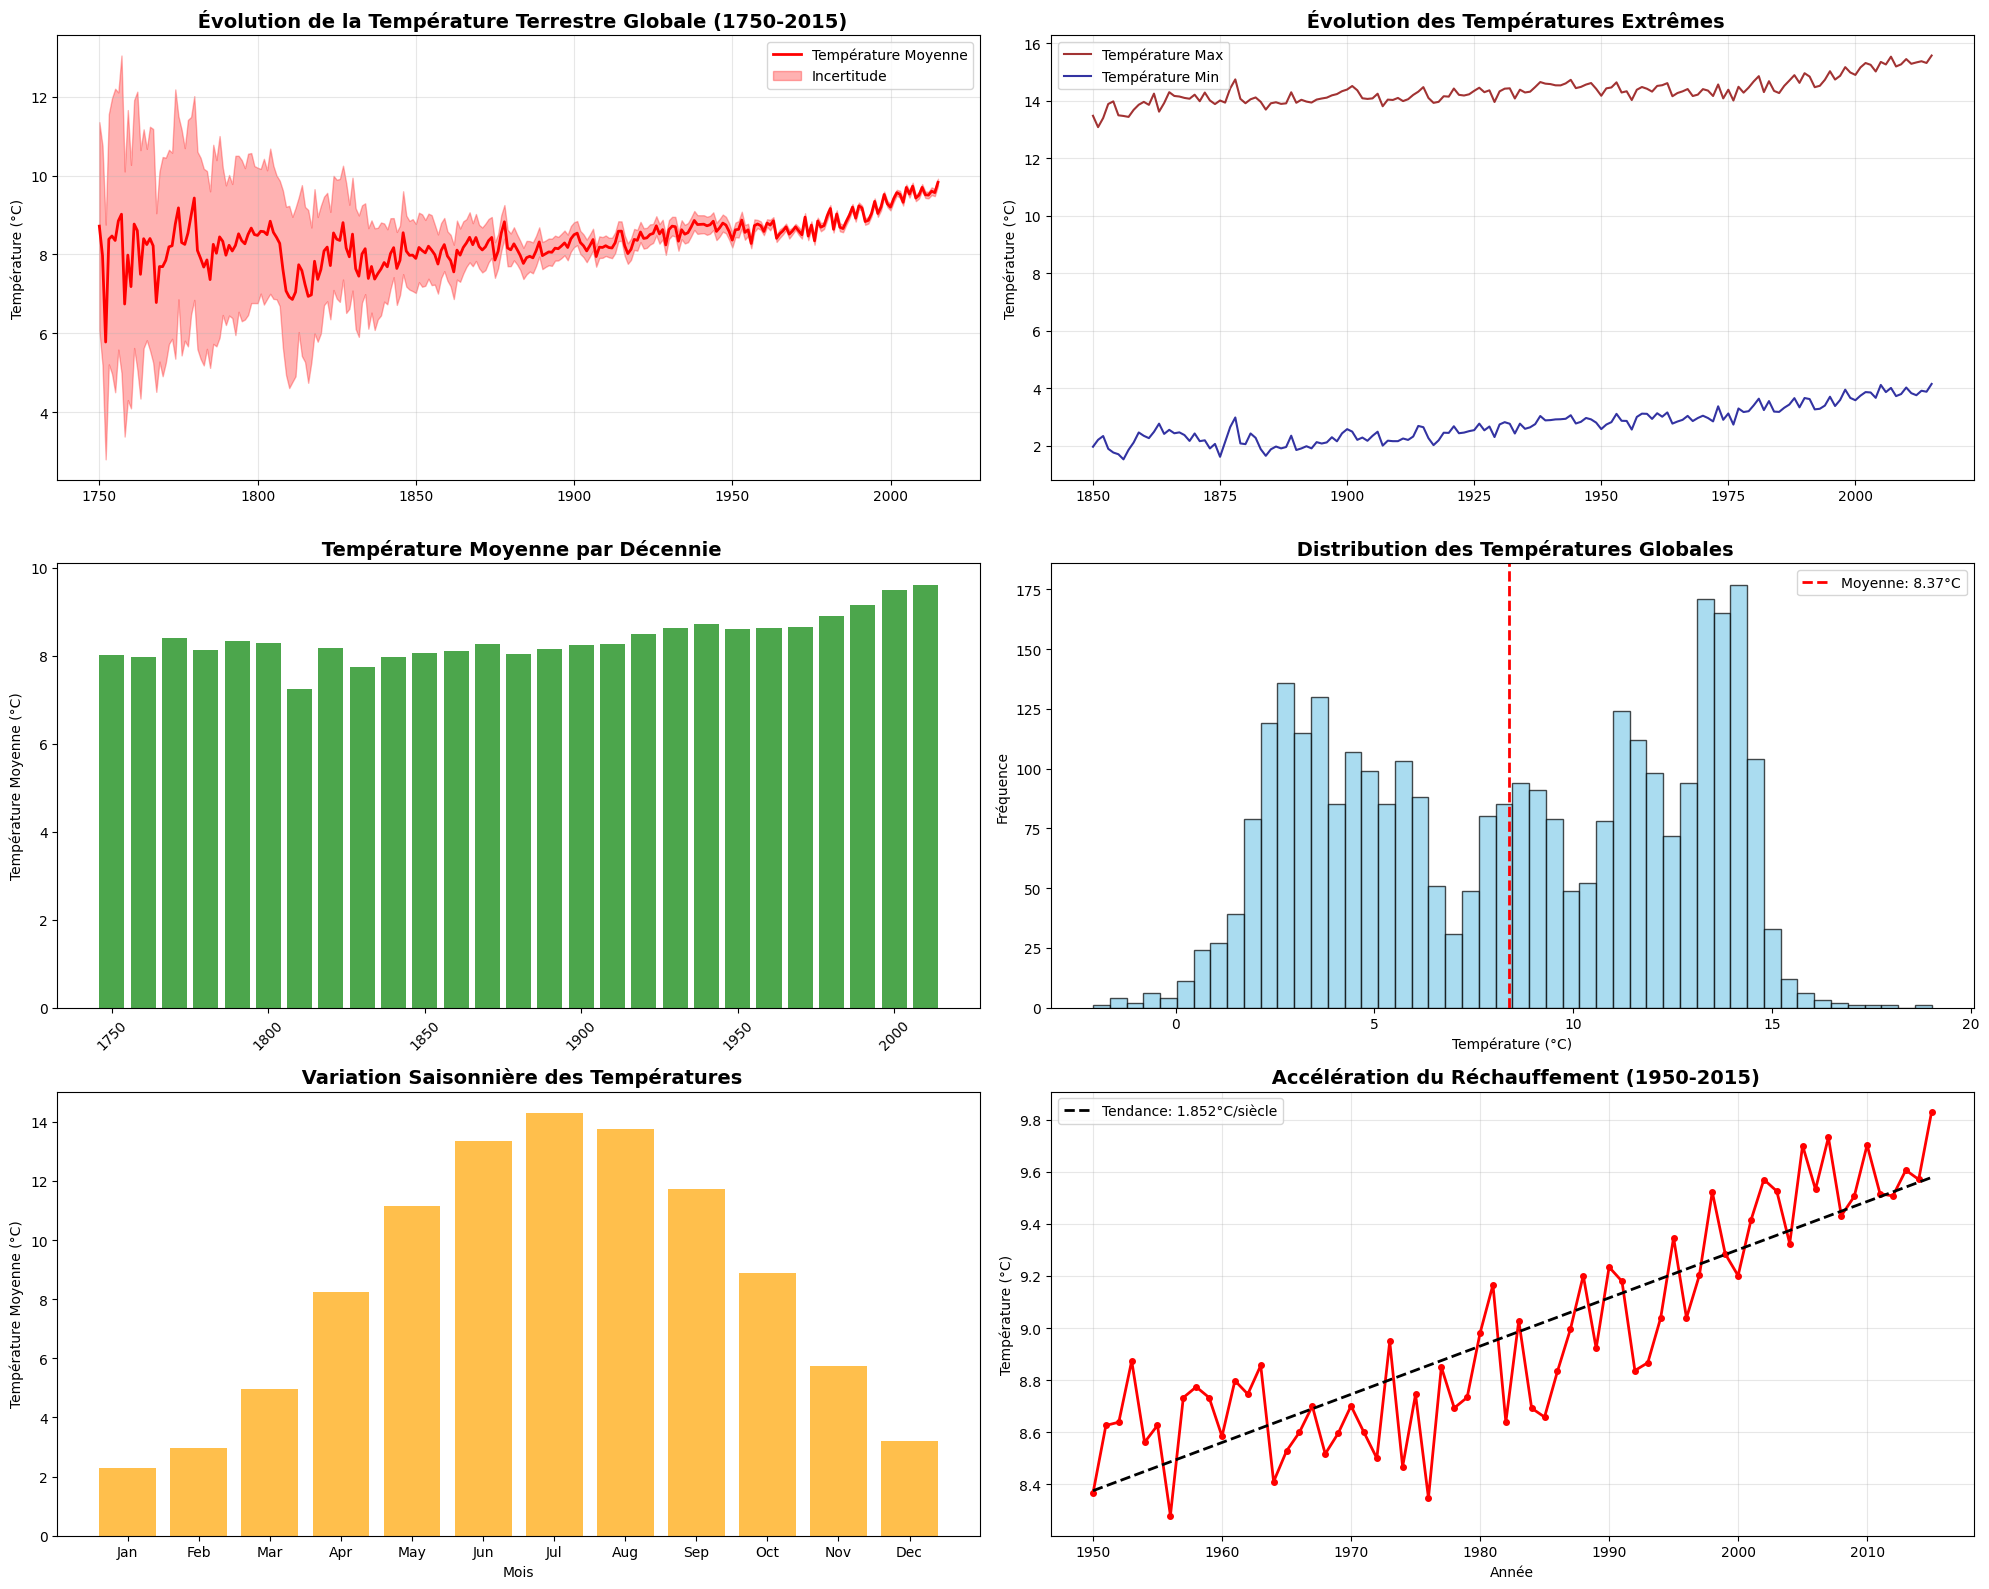

In [10]:
print(" ANALYSE APPROFONDIE DES DONNÉES CLIMATIQUES RÉELLES")
print("=" * 65)

# Recréation de yearly_global qui manquait
yearly_global = global_temp_clean.groupby('Year').agg({
    'LandAverageTemperature': 'mean',
    'LandAverageTemperatureUncertainty': 'mean',
    'LandMaxTemperature': 'mean', 
    'LandMinTemperature': 'mean'
}).reset_index()

print(f" yearly_global recréé: {yearly_global.shape}")

# Configuration des graphiques
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))

# Graphique 1: Évolution complète avec incertitude
plt.subplot(3, 2, 1)
plt.plot(yearly_global['Year'], yearly_global['LandAverageTemperature'], 
         linewidth=2, color='red', label='Température Moyenne')
plt.fill_between(yearly_global['Year'],
                yearly_global['LandAverageTemperature'] - yearly_global['LandAverageTemperatureUncertainty'],
                yearly_global['LandAverageTemperature'] + yearly_global['LandAverageTemperatureUncertainty'],
                alpha=0.3, color='red', label='Incertitude')
plt.title(' Évolution de la Température Terrestre Globale (1750-2015)', fontsize=14, fontweight='bold')
plt.ylabel('Température (°C)')
plt.grid(True, alpha=0.3)
plt.legend()

# Graphique 2: Comparaison températures min/max
plt.subplot(3, 2, 2)
plt.plot(yearly_global['Year'], yearly_global['LandMaxTemperature'], 
         label='Température Max', color='darkred', alpha=0.8)
plt.plot(yearly_global['Year'], yearly_global['LandMinTemperature'], 
         label='Température Min', color='darkblue', alpha=0.8)
plt.title(' Évolution des Températures Extrêmes', fontsize=14, fontweight='bold')
plt.ylabel('Température (°C)')
plt.legend()
plt.grid(True, alpha=0.3)

# Graphique 3: Analyse par décennies
plt.subplot(3, 2, 3)
decade_avg = yearly_global.groupby((yearly_global['Year'] // 10) * 10)['LandAverageTemperature'].mean()
plt.bar(decade_avg.index, decade_avg.values, color='green', alpha=0.7, width=8)
plt.title(' Température Moyenne par Décennie', fontsize=14, fontweight='bold')
plt.ylabel('Température Moyenne (°C)')
plt.xticks(rotation=45)

# Graphique 4: Distribution des températures
plt.subplot(3, 2, 4)
plt.hist(global_temp_clean['LandAverageTemperature'].dropna(), bins=50, 
         alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(global_temp_clean['LandAverageTemperature'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f'Moyenne: {global_temp_clean["LandAverageTemperature"].mean():.2f}°C')
plt.title(' Distribution des Températures Globales', fontsize=14, fontweight='bold')
plt.xlabel('Température (°C)')
plt.ylabel('Fréquence')
plt.legend()

# Graphique 5: Analyse saisonnière
plt.subplot(3, 2, 5)
monthly_avg = global_temp_clean.groupby('Month')['LandAverageTemperature'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), monthly_avg.values, color='orange', alpha=0.7)
plt.title(' Variation Saisonnière des Températures', fontsize=14, fontweight='bold')
plt.xlabel('Mois')
plt.ylabel('Température Moyenne (°C)')
plt.xticks(range(1, 13), months)

# Graphique 6: Tendance du réchauffement (zoom 1950-2015)
plt.subplot(3, 2, 6)
recent = yearly_global[yearly_global['Year'] >= 1950]
plt.plot(recent['Year'], recent['LandAverageTemperature'], 'o-', color='red', linewidth=2, markersize=4)

# Régression linéaire pour la tendance
z = np.polyfit(recent['Year'], recent['LandAverageTemperature'], 1)
p = np.poly1d(z)
plt.plot(recent['Year'], p(recent['Year']), '--', color='black', linewidth=2, 
         label=f'Tendance: {z[0]*100:.3f}°C/siècle')

plt.title(' Accélération du Réchauffement (1950-2015)', fontsize=14, fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Température (°C)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()